First I needed to install the pybind package for python and for c++ to use:
```
pip install pybind11
sudo apt-get install pybind11-dev
sudo apt-install Jupyter-core
jupyter nbextension enable --py widgetsnbextension --sys-prefix
jupyter nbextension enable --py --sys-prefix ipympl

```


In [5]:
import sys
print(sys.path)
sys.path.append('/home/jinakaks/Duke/Orbital_Mechanics/')
import Orbit_Sim
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

# G = 6.67259*10**-20

masses = [10**29,10**29,10**29,10**25,10**25]

# Of format Rx, Vx
vectors = [
    [-300000,0,0],
    [0,0,0],
    [0,0,0],
    [250,250,0],
    [300000,0,0],
    [0,0,0],
    [-100000,-300000,0],
    [300,300,0],
    [0,6000000,0],
    [50,0,0]
]
VN = []
RN = []
for i in range(len(vectors)):
    if (i % 2 == 0):
        RN += vectors[i]
    else:
        VN += vectors[i]

y0 = VN + RN
t0 = 0
t_end = 90000
h = 1
print(y0)
print(masses)
raw_t, raw_y = Orbit_Sim.runge_kutta_system(y0,masses,t0,t_end,h,6.67259*10**-20)


['/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/home/jinakaks/.local/lib/python3.10/site-packages', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/home/jinakaks/Duke/Orbital_Mechanics/', '/home/jinakaks/Duke/Orbital_Mechanics/']
[0, 0, 0, 250, 250, 0, 0, 0, 0, 300, 300, 0, 50, 0, 0, -300000, 0, 0, 0, 0, 0, 300000, 0, 0, -100000, -300000, 0, 0, 6000000, 0]
[100000000000000000000000000000, 100000000000000000000000000000, 100000000000000000000000000000, 10000000000000000000000000, 10000000000000000000000000]


<Figure size 640x480 with 0 Axes>

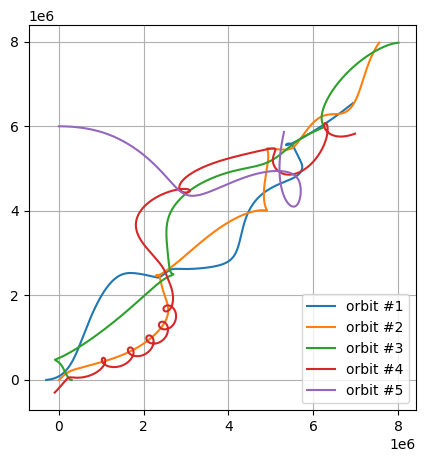

In [6]:
t_values = np.array(raw_t)
y_values = np.array(raw_y)
# print(type(y_values))
# print(len(y_values))
# print(len(t_values))

# print(t_values[:5])
# print(y_values[:5])
# Static Plot
plt.clf()
plt.figure( figsize=(5,5) )

current = int(len(y_values[0])/2)

x_vals = []
y_vals = []
for x in range(len(masses)):
    x_val = y_values[:,current]
    x_vals.append(x_val)
    y_val = y_values[:,current+1]
    y_vals.append(y_val)
    plt.plot( x_val , y_val , label = 'orbit #' + str(x+1) )
    current += 3

# plt.xlim(left=-10**6,right=10**7)
# plt.ylim(bottom=-10**6,top=10**7)

plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

5
120


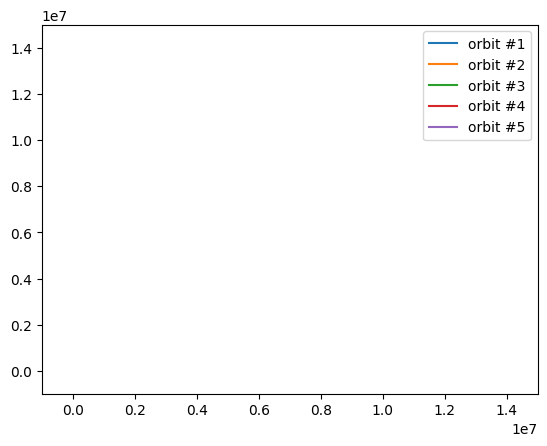

In [6]:
# Moving Plot
fig, ax = plt.subplots()
line_orbits = []
for i in range(len(masses)):
    line_orbit, = ax.plot( x_vals[i][0] , y_vals[i][0] , label = 'orbit #' + str(i+1) )
    line_orbits.append(line_orbit)

print(len(x_vals))
def animation_movie( frame ):
    for i, line in enumerate(line_orbits):
        line.set_xdata(x_vals[i][:frame])
        line.set_ydata(y_vals[i][:frame])
    return line_orbits

n_steps = int( ( t_end - t0 ) / h )

num_seconds_for_animation = 12
milliseconds_per_frame = 16

frame_interval = int((milliseconds_per_frame*n_steps)/(1000*num_seconds_for_animation))
print(frame_interval)

animation = FuncAnimation( fig , animation_movie , frames = range(0,n_steps,frame_interval) , interval = milliseconds_per_frame , blit = True )

ax.legend()
ax.set_xlim(-10**6,1.5*10**7)
ax.set_ylim(-10**6,1.5*10**7)
# fig.show()
# animation.save()